# 沪深指数变化

## 数据来源

中证指数网站的沪深300数据 [https://www.csindex.com.cn/#/indices/family/detail?indexCode=000300]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用于显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
data = pd.read_excel('./沪深.xlsx')
print(data.head())
data.set_index('日期Date', inplace=True)
print(data.shape)

     日期Date   开盘Open   最高High    最低Low  收盘Close
0  20250225  3933.64  3955.43  3915.65  3925.65
1  20250226  3931.84  3960.33  3925.37  3959.94
2  20250227  3961.06  3973.93  3933.46  3968.12
3  20250228  3950.19  3972.48  3886.40  3890.05
4  20250303  3899.70  3930.00  3872.59  3888.47
(19, 4)


数据分别是日期、开盘和收盘价、最高最低价，19行

## 多元统计分析
### 皮尔逊和斯皮尔曼
皮尔逊相关系数要求服从正态分布，先进行正态分布检验，由于是小样本，可以用A-D检验

$H_0:数据服从正态分布 \\ H_0:数据不服从正态分布$


In [2]:
from scipy.stats import anderson
for i in range(data.shape[1]):
    result = anderson(data.iloc[:, i], dist= 'norm')
    print('stat=%.3f' % (result.statistic))  # 统计量
print("临界值:",result.critical_values)   # P值
print("显著性水平:",result.significance_level) # 显著性水平


stat=0.376
stat=0.349
stat=0.514
stat=0.334
临界值: [0.505 0.575 0.69  0.804 0.957]
显著性水平: [15.  10.   5.   2.5  1. ]


统计量分别为0.376、0.349、0.514、0.334，显著性水平为0.15、0.1、0.05、0.25、0.01时，临界值为0.505、0.575、0.69、0.804、0.957，统计量基本都小于临界值，我们可以认为这四组数据服从正态分布，可以进行皮尔逊相关系数计算。

Text(0.5, 1.0, '斯皮尔曼相关系数热力图')

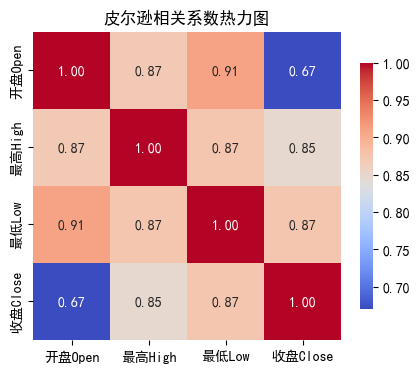

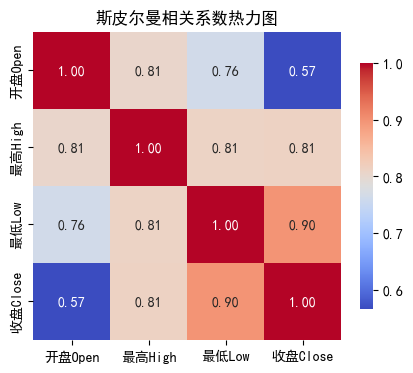

In [3]:
import seaborn as sns
# 皮尔逊相关系数热力图
pearson_corr = data.corr(method='pearson')
plt.figure(figsize=(5, 4))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('皮尔逊相关系数热力图')

spearman_corr = data.corr(method='spearman')
plt.figure(figsize=(5, 4))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('斯皮尔曼相关系数热力图')

从两个相关系数热力图可以看出，开盘和收盘相关性很弱，最高和开盘、最低和收盘相关性很强

### 相关性检验
常用t检验：$t=r\sqrt{\frac{n-2}{1-r^2}}$

In [10]:
import scipy.stats as stats
for i in range(data.shape[1]):
    for j in range(i+1, data.shape[1]):
        correlation_coefficient, p_value = stats.pearsonr(data.iloc[:, i], data.iloc[:, j])  # 计算相关系数和p值
        print(f"p值: {p_value:2f}")

p值: 0.000001
p值: 0.000000
p值: 0.001699
p值: 0.000001
p值: 0.000005
p值: 0.000001


p值均很小，认为有显著相关性